In [1]:
import pandas as pd

# WHY TO USE KNN
1. Problem Definition- Multiclass problem,very useful
2. Assumptions - There are no assumptions, like linearly seperable.
3. Optimization of K 


# WHEN NOT TO USE KNN
1.  It is advised to use the KNN algorithm for multiclass classification if the number of samples of the data is less than 50,000. KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.
2. There is not an easy way which is defined to compute the features which are responsible for the classification.

In [2]:
df = pd.read_csv('http://www.amlbook.com/data/zip/features.train', sep ="  ", names = ['qauality', 'f1','f2'])

C:\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
df.head()

,qauality,f1,f2
0,6.0,0.341092,-4.528937
1,5.0,0.444131,-5.496812
2,4.0,0.231002,-2.886750
3,7.0,0.200275,-3.534375
4,3.0,0.291936,-4.352062


In [4]:
df['TARGET CLASS'] = df['qauality']

In [5]:
df.head()

,qauality,f1,f2,TARGET CLASS
0,6.0,0.341092,-4.528937,6.0
1,5.0,0.444131,-5.496812,5.0
2,4.0,0.231002,-2.886750,4.0
3,7.0,0.200275,-3.534375,7.0
4,3.0,0.291936,-4.352062,3.0


In [6]:
df = df.drop('qauality',axis=1)

In [7]:
# df.head()

# STANDARDIZATION 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
#REMEMBER TO PUT THE TARGET CLASS IN END

StandardScaler()

In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()
#I COULD HAVE CHANGE THE INDEXING HERE, SO I DIDNT HAD TO APPEND THE TARGET CLASS 

,f1,f2
0,0.931923,-0.753856
1,2.040608,-1.402332
2,-0.252627,0.346409
3,-0.583241,-0.087500
4,0.403009,-0.635350


# PAIR PLOT


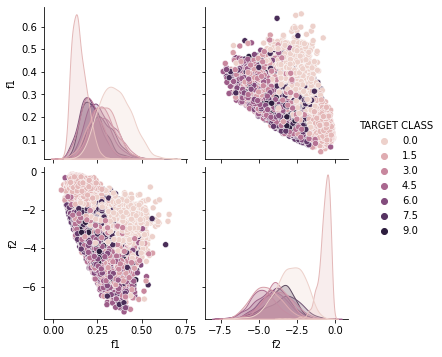

In [13]:
import seaborn as sns
sns.pairplot(df,hue = 'TARGET CLASS')
#use hue to get plotting against classes, to understand the distribution.

In [14]:
#note- there is lot of intermixing of classes, so we cant use linear regression(data has to be linearly seperable) and 
#desicion tree(since it will be big tree, more the intermixing, more the depth of tree) 

# TRAIN TEST SPLIT 

In [15]:
from sklearn.model_selection import train_test_split
#train_test_split is a function, not the object

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.20)

# KNN 
1. WE NEED TO OPTIMIZE THE VALUE OF K, SO WE SHOULD ALWAYS START FROM K=1. ALSO CHOOSING THE ODD VALUE OF K IS BETTER THAN CHOOSING EVEN. 




In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
#object creation, now we can call its methods to do things further

In [19]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred = knn.predict(X_test)

# PREDICTION AND EVALUATION

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [22]:
print(confusion_matrix(Y_test,pred))

[[138   7  12  13   3   7   4   3  33  13]
 [  3 194   0   0   2   0   0   0   4   1]
 [  9   0  22  20  24  21  15  21  18  10]
 [ 21   0  18  17  11  11  15   4  11  12]
 [  3   4  22   9  16  11  12  19   4  12]
 [  5   1  20  17  11  14  22   9   3   8]
 [  6   0  20  15  14  17  17  10   9  18]
 [  3   0  14   8  33  17  17  34   2  12]
 [ 24   3   6  18  14   6   8   1  20  11]
 [ 10   0  13  16  15  12  16  19  12  30]]


In [23]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

         0.0       0.62      0.59      0.61       233
         1.0       0.93      0.95      0.94       204
         2.0       0.15      0.14      0.14       160
         3.0       0.13      0.14      0.13       120
         4.0       0.11      0.14      0.13       112
         5.0       0.12      0.13      0.12       110
         6.0       0.13      0.13      0.13       126
         7.0       0.28      0.24      0.26       140
         8.0       0.17      0.18      0.18       111
         9.0       0.24      0.21      0.22       143

    accuracy                           0.34      1459
   macro avg       0.29      0.29      0.29      1459
weighted avg       0.35      0.34      0.35      1459



In [24]:
#since accuracy and recall values are very low we need to find the optimum value of k

# CHOOSING K VALUE

In [25]:
accuracy_rate = []

for i in range(1,40):
#k doesnt start with 1 and the last value trial.
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'], cv=10)
    accuracy_rate.append(score.mean())

C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature

In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'accuracy rate')

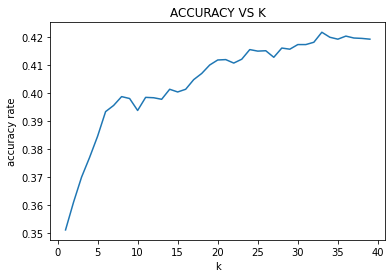

In [28]:
plt.plot(range(1,40),accuracy_rate)
#pass x, y
plt.title('ACCURACY VS K')
#for title
plt.xlabel('k')
plt.ylabel('accuracy rate')

In [29]:
error_rate = []

for i in range(1,40):
#k doesnt start with 1 and the last value trial.
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'], cv=10)
    error_rate.append(1-score.mean())

C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature

Text(0, 0.5, 'error rate')

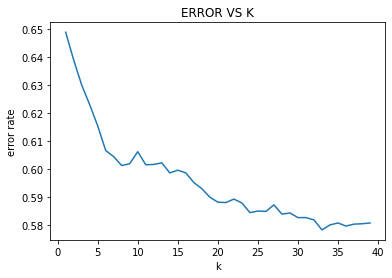

In [30]:
plt.plot(range(1,40),error_rate)
#pass x, y
plt.title('ERROR VS K')
#for title
plt.xlabel('k')
plt.ylabel('error rate')

In [31]:
#we can see that accuracy doesnt rise with unexpected push after the 20 and same with error. 
#choosing k as 21